In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
x = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [3]:
x = x[['v1', 'v2']]
x.columns = ['label', 'message']

In [4]:
x['label'] = x['label'].map({'ham': 0, 'spam': 1})

In [5]:
print("Label distribution:\n", x['label'].value_counts())

Label distribution:
 label
0    4825
1     747
Name: count, dtype: int64


In [6]:
Xt, X_test, yt, y_test = train_test_split(
x['message'], x['label'], test_size=0.2, random_state=42, stratify=x['label']
)

In [7]:
vt = TfidfVectorizer(stop_words='english', max_features=5000)
Xtt = vt.fit_transform(Xt)
Xttfidf = vt.transform(X_test)

In [8]:
model = MultinomialNB()
model.fit(Xtt, yt)

MultinomialNB()

In [9]:
y_pred = model.predict(Xttfidf)

Accuracy: 0.9721973094170404

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



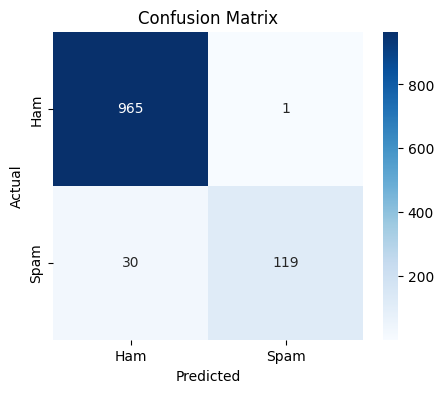

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
print("\n--- Spam/Ham Detector ---")
while True:
    user_msg = input("Enter a message (or type 'exit' to quit): ")
    if user_msg.lower() == 'exit':
        break
    msg_vec = vt.transform([user_msg])
    prediction = model.predict(msg_vec)[0]
    print("Prediction:", "Spam 🚫" if prediction else "Ham ✅")


--- Spam/Ham Detector ---
Enter a message (or type 'exit' to quit): congratulation you won a lottery ticket
Prediction: Ham ✅
Enter a message (or type 'exit' to quit): congratulations!  you have won a free lottery ticket 
Prediction: Spam 🚫
Enter a message (or type 'exit' to quit): exit
